### How accurate is the cross correlation based template matching algorithm in identifying small images in bigger image
For this research I took a snapshot of one of my database viewer application UI. Then I resized it and took some small snapshots of the different sections of the UI as my samples. Lets see how the template matching works.

### Step 1: Take a snapshot of the main window

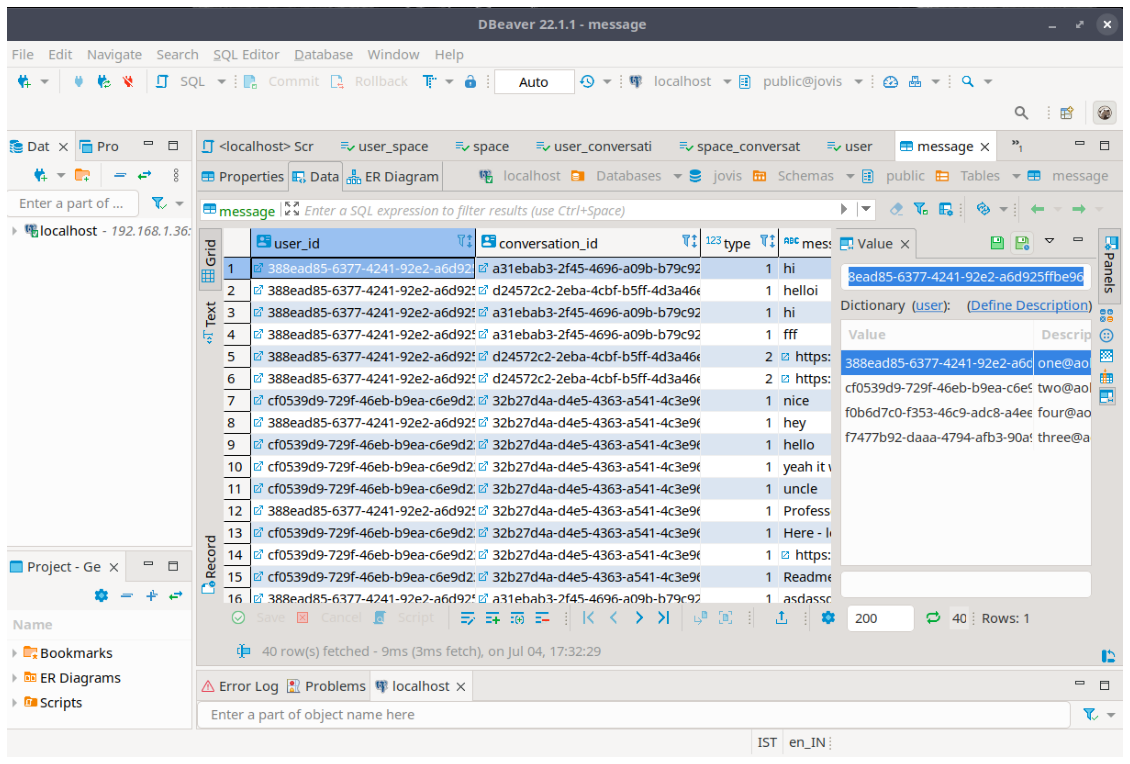

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

target_img = imread('resources/template_matching/target_image.png')


plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(target_img)

### Step 2: Take snapshot of a lot of different sub sections of the UI and save them with different names

I have already taken the screenshots and saved them in the resources folder. I have about 10 of them

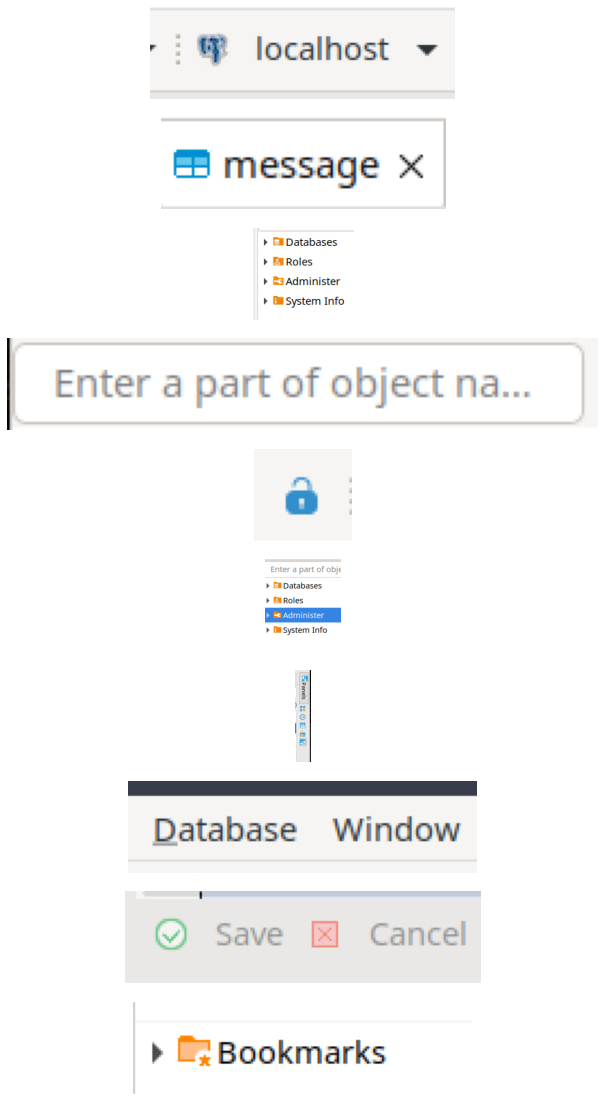

In [2]:
fig, ax = plt.subplots(nrows=10, figsize=(20,20))

def render_preview(image, location):
    ax[location].axis("off")
    ax[location].imshow(image, cmap="gray")
    
for index in range(10):
    render_preview(imread('resources/template_matching/subimages/'+str(index)+'.png'), index)   

### Step 3: Try and locate these images on the target image.
Let me try to find one or two images and then i will generalize it.

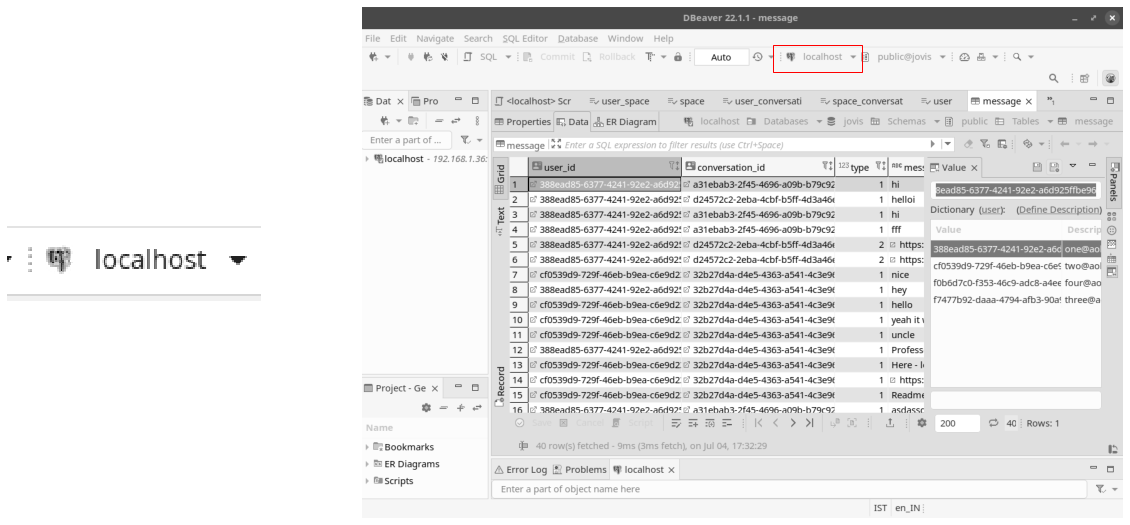

In [19]:
from skimage.feature import match_template
import numpy as np

# gray scale the images
target_img = rgb2gray(imread('resources/template_matching/target_image.png'))
sub_image = rgb2gray(imread('resources/template_matching/subimages/0.png'))
result = match_template(target_img, sub_image)

ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig, ax = plt.subplots(figsize=(20,20), ncols=2, gridspec_kw={'width_ratios': [1, 3]}) 

ax[0].axis("off")
ax[1].axis("off")
ax[0].imshow(sub_image, cmap=plt.cm.gray, interpolation='nearest', aspect='1')

ax[1].imshow(target_img, cmap=plt.cm.gray)
height, width = sub_image.shape
rect = plt.Rectangle((x, y), width,height, edgecolor='r', facecolor='none')
ax[1].add_patch(rect)
plt.show()

Let me find all the images one by one

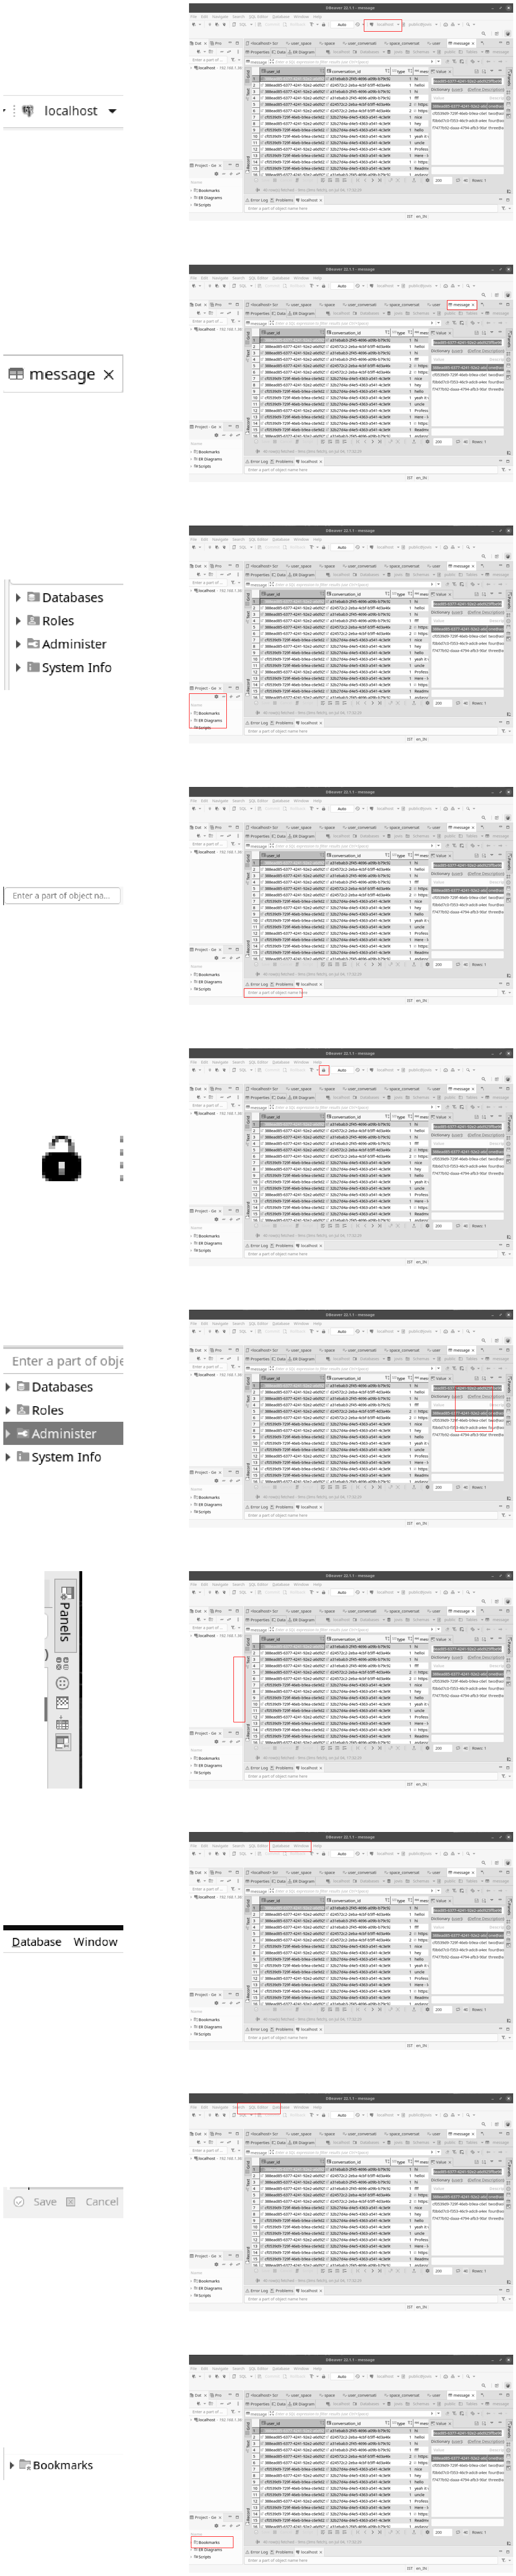

In [24]:
def template_match_on_target_image(target_img_path):
    target_img = rgb2gray(imread(target_img_path))
    fig, ax = plt.subplots(figsize=(20,100), nrows=10, ncols=2, gridspec_kw={'width_ratios': [1, 3]})
    for index in range(10):
        sub_image = rgb2gray(imread('resources/template_matching/subimages/'+str(index)+'.png'))
        result = match_template(target_img, sub_image)

        ij = np.unravel_index(np.argmax(result), result.shape)
        x, y = ij[::-1]


        ax[index][0].axis("off")
        ax[index][1].axis("off")

        ax[index][0].imshow(sub_image, cmap=plt.cm.gray, interpolation='nearest', aspect='1')

        ax[index][1].imshow(target_img, cmap=plt.cm.gray)
        height, width = sub_image.shape
        rect = plt.Rectangle((x, y), width,height, edgecolor='r', facecolor='none')
        ax[index][1].add_patch(rect)

    plt.show()
    
    
template_match_on_target_image('resources/template_matching/target_image.png')

### Some of the screenshots that I took were from a different target window state. Let me try the template matching on that other image.

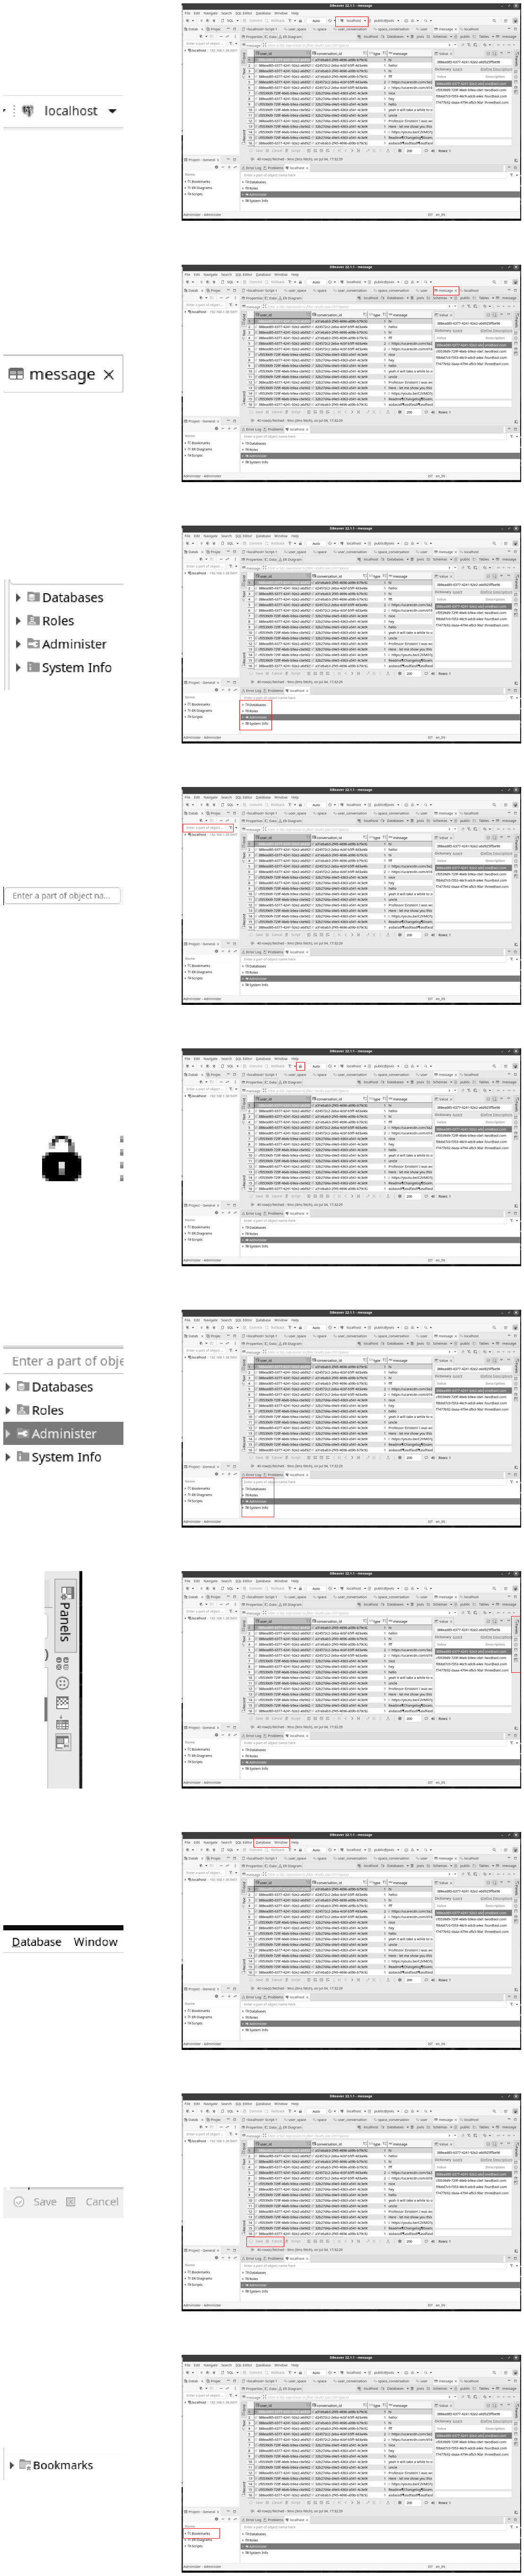

In [25]:
template_match_on_target_image('resources/template_matching/target_image2.png')

### how sensitive is the algorithm to size of the window

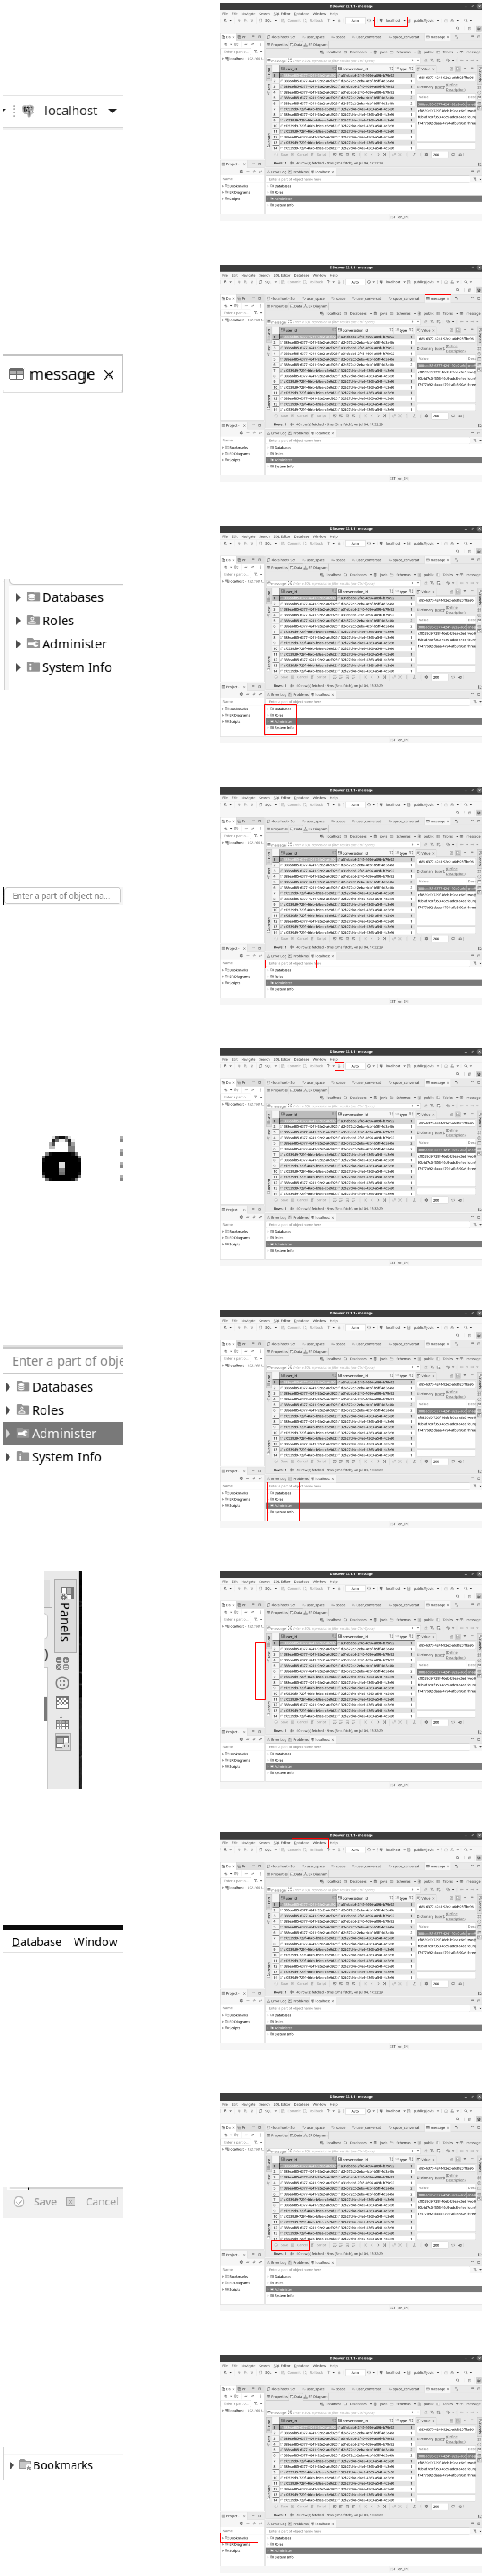

In [26]:
template_match_on_target_image('resources/template_matching/target_image3.png')

## interesting!!